In [1]:
#import our Neural Net with 3 layers. Change path depending on where the script is located
exec(open("../Utilities/NNx3.py").read())
import pandas as pd
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt

import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('winequality_red_Train.csv')
dfTest = pd.read_csv('winequality_red_Test.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5


In [4]:
#check the data is clean of null values. if we see 0 then we are good
df.isnull().values.sum()

0

In [5]:
df['bad'] = 0
df['average'] = 0
df['good'] = 0
#for each row, if quality is between range, then bad, average good = this thing
for idx, row in enumerate(df['quality']):
    if(row < 5):
        df.loc[idx,'bad'] = 1
    elif(row >6):
        df.loc[idx,'good'] = 1
    else:
        df.loc[idx,'average'] = 1

dfTest['bad'] = 0
dfTest['average'] = 0
dfTest['good'] = 0
#for each row, if quality is between range, then bad, average good = this thing
for idx, row in enumerate(dfTest['quality']):
    if(row < 5):
        dfTest.loc[idx,'bad'] = 1
    elif(row >6):
        dfTest.loc[idx,'good'] = 1
    else:
        dfTest.loc[idx,'average'] = 1

In [6]:
df = normalise(df)
dfTest = normalise(dfTest)

In [7]:
# Train Get labels
y = df[['bad','average','good']].values
# Get inputs; we define our x and y here.
X = df.drop(['quality', 'bad','average','good'], axis = 1)
X.shape, y.shape # Print shapes just to check
X = X.values

# Get test labels
yTest = dfTest[['bad','average','good']].values
# Get inputs; we define our x and y here.
XTest = dfTest.drop(['quality', 'bad','average','good'], axis = 1)
XTest.shape, yTest.shape # Print shapes just to check
XTest = XTest.values

inputDimensions = 11
hiddenDimensions = 20
outputDimensions = 3
learningRate = .7
trainingCycles = 100000

In [8]:
#need to make random start from a base of 0
np.random.seed(0)
#epochs is one full training forward and back propagation
#LEarning rate is hoow rapidly the parameters change
# This is what we return at the end
model = initialise_parameters(nn_input_dim=inputDimensions, nn_hdim= hiddenDimensions, nn_output_dim= outputDimensions)

Loss after iteration 0 : 2.045099124455577
Accuracy after iteration 0 : 82.32154769846565 %
Loss after iteration 100 : 1.2361786393178504
Accuracy after iteration 100 : 82.32154769846565 %
Loss after iteration 200 : 0.8784661712010307
Accuracy after iteration 200 : 82.32154769846565 %
Loss after iteration 300 : 0.64081687153566
Accuracy after iteration 300 : 82.32154769846565 %
Loss after iteration 400 : 0.6317811361648137
Accuracy after iteration 400 : 82.32154769846565 %
Loss after iteration 500 : 0.504408300433591
Accuracy after iteration 500 : 82.32154769846565 %
Loss after iteration 600 : 0.577422098027486
Accuracy after iteration 600 : 82.32154769846565 %
Loss after iteration 700 : 0.5739333023416207
Accuracy after iteration 700 : 82.32154769846565 %
Loss after iteration 800 : 0.5614405793275706
Accuracy after iteration 800 : 82.32154769846565 %
Loss after iteration 900 : 0.5414328813070245
Accuracy after iteration 900 : 82.32154769846565 %
Loss after iteration 1000 : 0.531563728

Loss after iteration 8300 : 0.43411287739011334
Accuracy after iteration 8300 : 83.32221480987326 %
Loss after iteration 8400 : 0.433152770081435
Accuracy after iteration 8400 : 83.32221480987326 %
Loss after iteration 8500 : 0.43228227061558283
Accuracy after iteration 8500 : 83.25550366911274 %
Loss after iteration 8600 : 0.4315001813847158
Accuracy after iteration 8600 : 83.25550366911274 %
Loss after iteration 8700 : 0.43080062160258564
Accuracy after iteration 8700 : 83.32221480987326 %
Loss after iteration 8800 : 0.4301736600980093
Accuracy after iteration 8800 : 83.32221480987326 %
Loss after iteration 8900 : 0.4295949571880701
Accuracy after iteration 8900 : 83.32221480987326 %
Loss after iteration 9000 : 0.42901289302143675
Accuracy after iteration 9000 : 83.45563709139427 %
Loss after iteration 9100 : 0.4283630187390282
Accuracy after iteration 9100 : 83.52234823215477 %
Loss after iteration 9200 : 0.42761601078620703
Accuracy after iteration 9200 : 83.52234823215477 %
Loss a

Loss after iteration 16500 : 0.39485118619047566
Accuracy after iteration 16500 : 84.45630420280187 %
Loss after iteration 16600 : 0.3946069009577658
Accuracy after iteration 16600 : 84.45630420280187 %
Loss after iteration 16700 : 0.39436810218361434
Accuracy after iteration 16700 : 84.45630420280187 %
Loss after iteration 16800 : 0.3941360686176091
Accuracy after iteration 16800 : 84.45630420280187 %
Loss after iteration 16900 : 0.39391093698787794
Accuracy after iteration 16900 : 84.45630420280187 %
Loss after iteration 17000 : 0.39369228319667227
Accuracy after iteration 17000 : 84.45630420280187 %
Loss after iteration 17100 : 0.39347932056057566
Accuracy after iteration 17100 : 84.45630420280187 %
Loss after iteration 17200 : 0.3932708912266815
Accuracy after iteration 17200 : 84.45630420280187 %
Loss after iteration 17300 : 0.3930654196220703
Accuracy after iteration 17300 : 84.45630420280187 %
Loss after iteration 17400 : 0.3928609443231917
Accuracy after iteration 17400 : 84.45

Loss after iteration 24600 : 0.3734971361835583
Accuracy after iteration 24600 : 84.52301534356238 %
Loss after iteration 24700 : 0.37333612216986384
Accuracy after iteration 24700 : 84.52301534356238 %
Loss after iteration 24800 : 0.3731700077052484
Accuracy after iteration 24800 : 84.52301534356238 %
Loss after iteration 24900 : 0.37299029279280754
Accuracy after iteration 24900 : 84.52301534356238 %
Loss after iteration 25000 : 0.37278295791056754
Accuracy after iteration 25000 : 84.52301534356238 %
Loss after iteration 25100 : 0.37254759979948715
Accuracy after iteration 25100 : 84.58972648432288 %
Loss after iteration 25200 : 0.3723133391748417
Accuracy after iteration 25200 : 84.58972648432288 %
Loss after iteration 25300 : 0.3720969283187572
Accuracy after iteration 25300 : 84.58972648432288 %
Loss after iteration 25400 : 0.3719386976020516
Accuracy after iteration 25400 : 84.58972648432288 %
Loss after iteration 25500 : 0.37321860717198607
Accuracy after iteration 25500 : 84.58

Loss after iteration 32800 : 0.3574884802289564
Accuracy after iteration 32800 : 84.98999332888593 %
Loss after iteration 32900 : 0.35601048629446946
Accuracy after iteration 32900 : 85.05670446964643 %
Loss after iteration 33000 : 0.3484825204446309
Accuracy after iteration 33000 : 86.25750500333555 %
Loss after iteration 33100 : 0.3462392403836891
Accuracy after iteration 33100 : 86.85790527018013 %
Loss after iteration 33200 : 0.3637686442263396
Accuracy after iteration 33200 : 84.98999332888593 %
Loss after iteration 33300 : 0.35022970312931034
Accuracy after iteration 33300 : 86.05737158105403 %
Loss after iteration 33400 : 0.3452566356771862
Accuracy after iteration 33400 : 87.19146097398266 %
Loss after iteration 33500 : 0.3633121207800933
Accuracy after iteration 33500 : 84.98999332888593 %
Loss after iteration 33600 : 0.34762728510457586
Accuracy after iteration 33600 : 86.32421614409607 %
Loss after iteration 33700 : 0.35029421831339286
Accuracy after iteration 33700 : 86.124

Loss after iteration 40900 : 0.3390279393407854
Accuracy after iteration 40900 : 88.05870580386924 %
Loss after iteration 41000 : 0.338814479605518
Accuracy after iteration 41000 : 88.05870580386924 %
Loss after iteration 41100 : 0.33860422932443685
Accuracy after iteration 41100 : 88.05870580386924 %
Loss after iteration 41200 : 0.3383980655377164
Accuracy after iteration 41200 : 88.05870580386924 %
Loss after iteration 41300 : 0.33819652719035115
Accuracy after iteration 41300 : 88.05870580386924 %
Loss after iteration 41400 : 0.3379993614089513
Accuracy after iteration 41400 : 88.12541694462975 %
Loss after iteration 41500 : 0.3378050734838377
Accuracy after iteration 41500 : 88.12541694462975 %
Loss after iteration 41600 : 0.3376107058334886
Accuracy after iteration 41600 : 88.12541694462975 %
Loss after iteration 41700 : 0.33741208046523125
Accuracy after iteration 41700 : 88.12541694462975 %
Loss after iteration 41800 : 0.3372045479218009
Accuracy after iteration 41800 : 88.12541

Loss after iteration 49100 : 0.3270470759245767
Accuracy after iteration 49100 : 88.5923949299533 %
Loss after iteration 49200 : 0.3269972325669755
Accuracy after iteration 49200 : 88.5923949299533 %
Loss after iteration 49300 : 0.32694804366657565
Accuracy after iteration 49300 : 88.5923949299533 %
Loss after iteration 49400 : 0.3268992784014187
Accuracy after iteration 49400 : 88.5923949299533 %
Loss after iteration 49500 : 0.3268506739712182
Accuracy after iteration 49500 : 88.5923949299533 %
Loss after iteration 49600 : 0.3268019133046631
Accuracy after iteration 49600 : 88.5923949299533 %
Loss after iteration 49700 : 0.32675258978042543
Accuracy after iteration 49700 : 88.5923949299533 %
Loss after iteration 49800 : 0.3267021467884003
Accuracy after iteration 49800 : 88.5923949299533 %
Loss after iteration 49900 : 0.3266497636232564
Accuracy after iteration 49900 : 88.5923949299533 %
Loss after iteration 50000 : 0.32659410694488145
Accuracy after iteration 50000 : 88.5923949299533

Loss after iteration 57200 : 0.31785875917170486
Accuracy after iteration 57200 : 89.19279519679787 %
Loss after iteration 57300 : 0.31777296890232976
Accuracy after iteration 57300 : 89.19279519679787 %
Loss after iteration 57400 : 0.3176863258675799
Accuracy after iteration 57400 : 89.19279519679787 %
Loss after iteration 57500 : 0.3176055542973619
Accuracy after iteration 57500 : 89.19279519679787 %
Loss after iteration 57600 : 0.3175623630088602
Accuracy after iteration 57600 : 89.19279519679787 %
Loss after iteration 57700 : 0.3179474829647681
Accuracy after iteration 57700 : 89.19279519679787 %
Loss after iteration 57800 : 0.3197800549349123
Accuracy after iteration 57800 : 89.12608405603736 %
Loss after iteration 57900 : 0.3172307399584542
Accuracy after iteration 57900 : 89.19279519679787 %
Loss after iteration 58000 : 0.3170825484864798
Accuracy after iteration 58000 : 89.19279519679787 %
Loss after iteration 58100 : 0.3169658678076513
Accuracy after iteration 58100 : 89.19279

Loss after iteration 65300 : 0.30466645627090677
Accuracy after iteration 65300 : 88.5923949299533 %
Loss after iteration 65400 : 0.3044499763045415
Accuracy after iteration 65400 : 88.5256837891928 %
Loss after iteration 65500 : 0.3042383736310207
Accuracy after iteration 65500 : 88.5256837891928 %
Loss after iteration 65600 : 0.3040324956081651
Accuracy after iteration 65600 : 88.5923949299533 %
Loss after iteration 65700 : 0.30383255734675746
Accuracy after iteration 65700 : 88.65910607071382 %
Loss after iteration 65800 : 0.30363819106229245
Accuracy after iteration 65800 : 88.5923949299533 %
Loss after iteration 65900 : 0.3034486383020321
Accuracy after iteration 65900 : 88.5923949299533 %
Loss after iteration 66000 : 0.3032629151591607
Accuracy after iteration 66000 : 88.5923949299533 %
Loss after iteration 66100 : 0.3030799189502787
Accuracy after iteration 66100 : 88.5923949299533 %
Loss after iteration 66200 : 0.3028985010170532
Accuracy after iteration 66200 : 88.592394929953

Loss after iteration 73400 : 0.2842789611261727
Accuracy after iteration 73400 : 89.59306204136091 %
Loss after iteration 73500 : 0.2840720757071046
Accuracy after iteration 73500 : 89.65977318212141 %
Loss after iteration 73600 : 0.28388921865113337
Accuracy after iteration 73600 : 89.65977318212141 %
Loss after iteration 73700 : 0.28371399969188543
Accuracy after iteration 73700 : 89.72648432288192 %
Loss after iteration 73800 : 0.2835438994536095
Accuracy after iteration 73800 : 89.72648432288192 %
Loss after iteration 73900 : 0.28337810032723953
Accuracy after iteration 73900 : 89.72648432288192 %
Loss after iteration 74000 : 0.2832161306458822
Accuracy after iteration 74000 : 89.72648432288192 %
Loss after iteration 74100 : 0.28305759746770165
Accuracy after iteration 74100 : 89.72648432288192 %
Loss after iteration 74200 : 0.2829021144152243
Accuracy after iteration 74200 : 89.72648432288192 %
Loss after iteration 74300 : 0.2827492711652889
Accuracy after iteration 74300 : 89.726

Loss after iteration 81500 : 0.27230707256579495
Accuracy after iteration 81500 : 90.4603068712475 %
Loss after iteration 81600 : 0.2721980751689916
Accuracy after iteration 81600 : 90.52701801200801 %
Loss after iteration 81700 : 0.2720870454151537
Accuracy after iteration 81700 : 90.52701801200801 %
Loss after iteration 81800 : 0.27197182847783813
Accuracy after iteration 81800 : 90.52701801200801 %
Loss after iteration 81900 : 0.27184908145415704
Accuracy after iteration 81900 : 90.52701801200801 %
Loss after iteration 82000 : 0.2717132345449315
Accuracy after iteration 82000 : 90.52701801200801 %
Loss after iteration 82100 : 0.27155586062257403
Accuracy after iteration 82100 : 90.52701801200801 %
Loss after iteration 82200 : 0.27137172364389267
Accuracy after iteration 82200 : 90.52701801200801 %
Loss after iteration 82300 : 0.27117564391155474
Accuracy after iteration 82300 : 90.66044029352902 %
Loss after iteration 82400 : 0.2709914127412238
Accuracy after iteration 82400 : 90.72

Loss after iteration 89600 : 0.26263711711727444
Accuracy after iteration 89600 : 91.26084056037358 %
Loss after iteration 89700 : 0.2625769564697748
Accuracy after iteration 89700 : 91.26084056037358 %
Loss after iteration 89800 : 0.26251720918181
Accuracy after iteration 89800 : 91.26084056037358 %
Loss after iteration 89900 : 0.26245783841252324
Accuracy after iteration 89900 : 91.26084056037358 %
Loss after iteration 90000 : 0.2623988083496437
Accuracy after iteration 90000 : 91.26084056037358 %
Loss after iteration 90100 : 0.26234008431257394
Accuracy after iteration 90100 : 91.26084056037358 %
Loss after iteration 90200 : 0.2622816328687469
Accuracy after iteration 90200 : 91.26084056037358 %
Loss after iteration 90300 : 0.2622234219487533
Accuracy after iteration 90300 : 91.26084056037358 %
Loss after iteration 90400 : 0.26216542093539663
Accuracy after iteration 90400 : 91.26084056037358 %
Loss after iteration 90500 : 0.2621076006866347
Accuracy after iteration 90500 : 91.26084

Loss after iteration 97700 : 0.25809555855210015
Accuracy after iteration 97700 : 91.3275517011341 %
Loss after iteration 97800 : 0.2580441634649977
Accuracy after iteration 97800 : 91.3275517011341 %
Loss after iteration 97900 : 0.2579932257135382
Accuracy after iteration 97900 : 91.3275517011341 %
Loss after iteration 98000 : 0.2579426686043626
Accuracy after iteration 98000 : 91.3275517011341 %
Loss after iteration 98100 : 0.2578924168205122
Accuracy after iteration 98100 : 91.3275517011341 %
Loss after iteration 98200 : 0.2578423957916602
Accuracy after iteration 98200 : 91.3275517011341 %
Loss after iteration 98300 : 0.2577925312402554
Accuracy after iteration 98300 : 91.3275517011341 %
Loss after iteration 98400 : 0.2577427489217451
Accuracy after iteration 98400 : 91.3275517011341 %
Loss after iteration 98500 : 0.25769297458509516
Accuracy after iteration 98500 : 91.3275517011341 %
Loss after iteration 98600 : 0.25764313419074125
Accuracy after iteration 98600 : 91.3275517011341

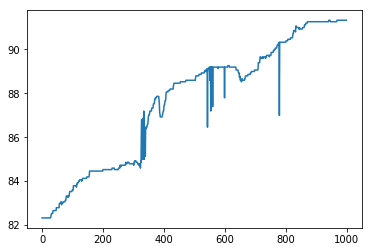

In [9]:
model = train(model,X,y,learning_rate=learningRate,epochs=trainingCycles,print_loss=True)
#model = train(model,X,y,learning_rate=0.07,epochs=4500,print_loss=True)
plt.gcf().clear()
plt.plot(losses)

In [15]:
yTest = predict(model,XTest)

In [16]:
#change the test answers data array into a 1d array that can be compared for measuring the accuracy
answersArray = []
for index, row in dfTest[['bad','average','good']].iterrows():
    #print(str(index) +" : "+str((row.values)))
    finalValue = 0;
    for idx, num in enumerate(row.values):
        correctedNum = idx*num
        finalValue += correctedNum
    answersArray.append(finalValue)
    #print(str(index) +":" +str(finalValue))

In [17]:
#The predicted answers
#yTest

In [18]:
#the real answers
answersArray = np.array(answersArray).astype(int)

In [19]:
#runn an accuracy score between the predicted numbers and real answers.
accuracy_score(answersArray, yTest)

0.82